# Análise de Saúde e Orçamento

Este notebook realiza uma análise exploratória de dados (EDA) com foco em saúde pública e orçamento, utilizando o dataset fornecido.

In [2]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

## Carregar o Dataset
Vamos carregar os dados de saúde e orçamento para análise.

In [4]:
# Carregar o dataset
dataset_path = '../datasets/saude_despesas.csv'
saude = pd.read_csv(dataset_path, delimiter=',')

# Exibir as primeiras linhas do dataset
saude.head()

,ano,id_municipio,sigla_uf,nome,cob_ab,cob_acs,cob_esf,cob_vac_bcg,cob_vac_rota,cob_vac_menin,...,desp_recp_saude_pc_mun,pct_desp_recp_saude_uf,desp_tot_saude_pc_uf,desp_recp_saude_pc_uf,desp_tot_saude_pc_mun_def,desp_recp_saude_pc_mun_def,desp_tot_saude_pc_uf_def,desp_recp_saude_pc_uf_def,num_familias_bf,gasto_pbf_pc_def
0,2010,1200013,AC,Acrelândia,100.0,100.0,100.0,42.962963,57.037037,1.111111,...,100.42,NaN,NaN,NaN,510.673460,192.304454,NaN,NaN,NaN,191.956615
1,2010,1200054,AC,Assis Brasil,100.0,100.0,100.0,55.357143,37.500000,0.000000,...,210.32,NaN,NaN,NaN,941.893506,402.763123,NaN,NaN,NaN,255.392586
2,2010,1200104,AC,Brasiléia,100.0,100.0,100.0,100.000000,88.322718,0.000000,...,104.82,NaN,NaN,NaN,397.420269,200.730461,NaN,NaN,NaN,220.697901
3,2010,1200138,AC,Bujari,100.0,100.0,100.0,90.566038,100.000000,0.000000,...,130.27,NaN,NaN,NaN,447.497559,249.467250,NaN,NaN,NaN,211.760211
4,2010,1200179,AC,Capixaba,100.0,100.0,100.0,49.746193,67.512690,0.000000,...,98.98,NaN,NaN,NaN,357.435037,189.546852,NaN,NaN,NaN,216.774669


## Limpeza de Dados
Antes de realizar análises, precisamos lidar com valores ausentes e ajustar o formato dos dados conforme necessário.

In [7]:
# Identificar valores ausentes
print('Valores ausentes por coluna:')
print(saude.isnull().sum())

# Substituir valores ausentes por 0 nas colunas financeiras
colunas_financeiras = [col for col in saude.columns if 'desp' in col or 'gasto' in col]
saude[colunas_financeiras] = saude[colunas_financeiras].fillna(0)

# Imputar valores ausentes nas demais colunas 
for col in saude.columns:
    if saude[col].dtype in ['float64', 'int64']:
        saude[col].fillna(saude[col].mean(), inplace=True)
    else:
        saude[col].fillna(saude[col].mode()[0], inplace=True)

saude.to_csv('datasets/saude_despesas_limpo.csv', index=False)

Valores ausentes por coluna:
ano                               0
id_municipio                      0
sigla_uf                          0
nome                              0
cob_ab                           19
                              ...  
desp_recp_saude_pc_mun_def      251
desp_tot_saude_pc_uf_def      66840
desp_recp_saude_pc_uf_def     66840
num_familias_bf               66840
gasto_pbf_pc_def                 15
Length: 68, dtype: int64


/tmp/ipykernel_375213/3040018961.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  saude[col].fillna(saude[col].mean(), inplace=True)
/tmp/ipykernel_375213/3040018961.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

## Análise Exploratória
Nesta etapa, exploraremos as relações entre as variáveis de saúde e orçamento.

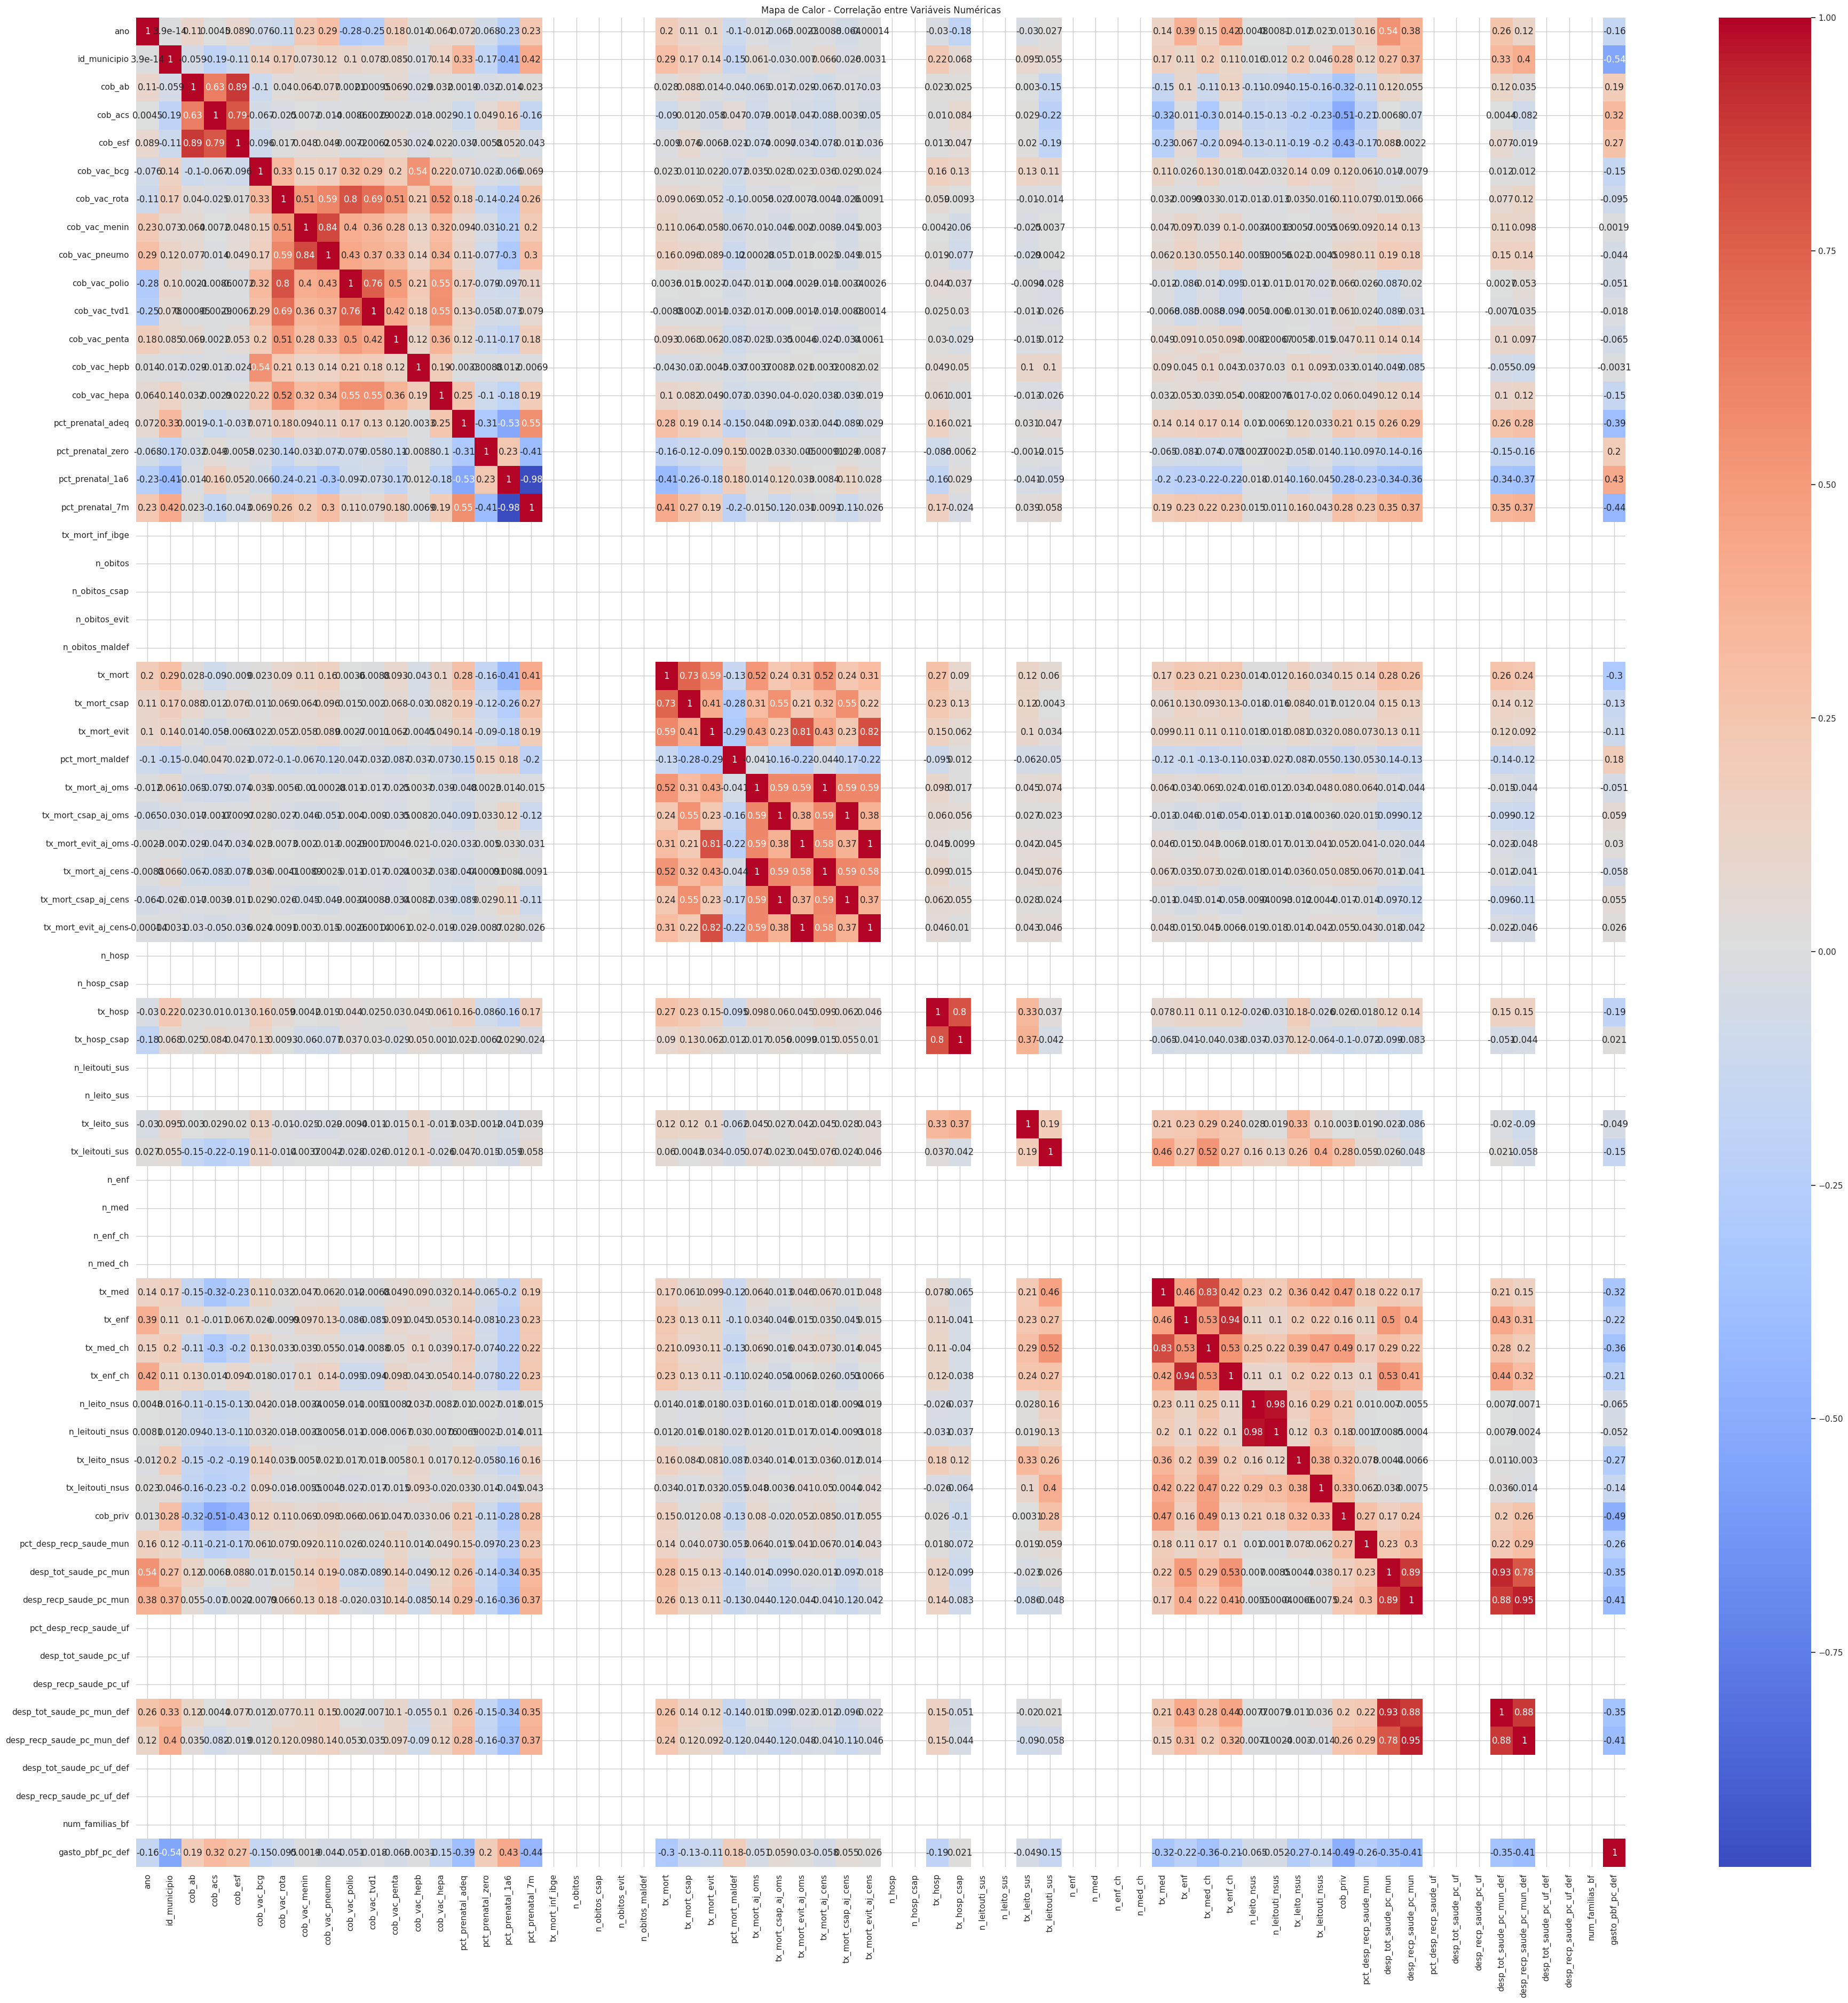

In [15]:
# Selecionar apenas colunas numéricas
colunas_numericas = saude.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação entre variáveis numéricas
correlacao = colunas_numericas.corr()

# Visualizar o heatmap de correlação
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(45, 45))
sns.heatmap(correlacao, cmap='coolwarm', annot=True, cbar=True)
plt.title("Mapa de Calor - Correlação entre Variáveis Numéricas")
plt.show()


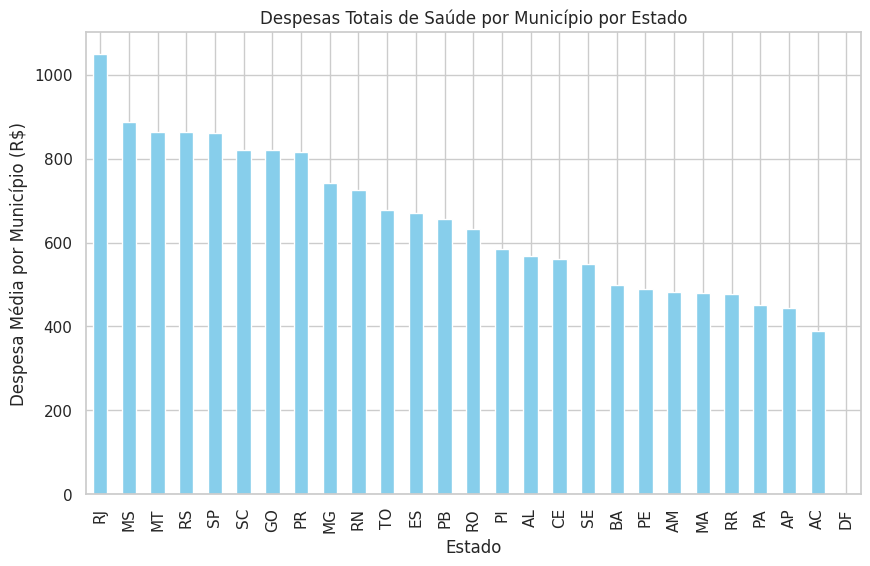

In [16]:
# Comparar despesas de saúde por estado
despesas_estado = saude.groupby('sigla_uf')['desp_tot_saude_pc_mun'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
despesas_estado.plot(kind='bar', color='skyblue')
plt.title('Despesas Totais de Saúde por Município por Estado')
plt.ylabel('Despesa Média por Município (R$)')
plt.xlabel('Estado')
plt.show()